---
---
---
---
# **Descripción del problema, EDA y Preprocesamiento**
---
---
---
---

$\ $

---
---
---
## **1. Carga de las librerías necesarias**
---
---
---

Lo primero que haremos será cargar las librerías necesarias para el análisis de los datos y la implementación de los modelos de machine learning.

In [74]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
%matplotlib inline
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

from sklearn.impute import SimpleImputer, KNNImputer # type: ignore
from sklearn.experimental import enable_iterative_imputer # type: ignore
from sklearn.impute import IterativeImputer # type: ignore
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # type: ignore
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
---
## **2. Descripción del problema**
---
---
---

En este desafío, analizaremos la vacunación, una medida clave de salud pública que se utiliza para combatir las enfermedades infecciosas. Las vacunas proporcionan inmunización a las personas, y una inmunización suficiente en una comunidad puede reducir aún más la propagación de enfermedades a través de la "inmunidad colectiva".

Este problema analiza la respuesta de la salud pública a una pandemia reciente de enfermedad respiratoria importante. A principios de la primavera de 2009, una pandemia causada por el virus de la influenza H1N1, coloquialmente llamado "gripe porcina", se extendió por todo el mundo. Los investigadores estiman que en el primer año, fue responsable de entre 151.000 y 575.000 muertes en todo el mundo .

En octubre de 2009 se puso a disposición del público una vacuna contra el virus de la gripe H1N1. A finales de 2009 y principios de 2010, Estados Unidos llevó a cabo la Encuesta Nacional sobre la Gripe H1N1 2009. En esta encuesta telefónica se preguntó a los encuestados si habían recibido las vacunas contra la gripe H1N1 y la gripe estacional, junto con preguntas sobre sí mismos. Estas preguntas adicionales abarcaron su contexto social, económico y demográfico, sus opiniones sobre los riesgos de la enfermedad y la eficacia de la vacuna, y sus comportamientos para mitigar la transmisión. Una mejor comprensión de cómo se asocian estas características con los patrones de vacunación personales puede proporcionar orientación para futuras iniciativas de salud pública.

Así, el objetvo de este desafío es predecir la probabilidad de que las personas reciban las vacunas contra la gripe H1N1 y la gripe estacional. En concreto, predeciremos dos probabilidades: una para `h1n1_vacciney` otra para `seasonal_vaccine`.

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **2.1. Etiquetas (Labels)**
---
---

Para esta competición hay dos variables objetivo:

- **`h1n1_vaccine`** $\Longrightarrow$ Si el encuestado recibió la vacuna contra la gripe H1N1.
- **`seasonal_vaccine`** $\Longrightarrow$ Si el encuestado recibió la vacuna contra la gripe estacional.

Ambas son variables binarias: `0 = No` y `1 = Sí`. Algunos encuestados no recibieron ninguna de las vacunas, otros solo recibieron una y algunos recibieron ambas. Esto se formula como un problema de múltiples etiquetas (y no de múltiples clases).

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **2.2. Caraacterísticas (Features)**
---
---

Se le proporciona un conjunto de datos con 36 columnas. La primera columna **`respondent_id`** es un identificador único y aleatorio. Las 35 características restantes se describen a continuación.

Para todas las variables binarias: `0 = No` y `1 = Sí`.

- **`h1n1_concern`** $\Longrightarrow$ Nivel de preocupación por la gripe H1N1.  
  - `0` = Nada preocupado  
  - `1` = No muy preocupado  
  - `2` = Algo preocupado  
  - `3` = Muy preocupado  

- **`h1n1_knowledge`** $\Longrightarrow$ Nivel de conocimientos sobre la gripe H1N1.  
  - `0` = Ningún conocimiento  
  - `1` = Un poco de conocimiento  
  - `2` = Mucho conocimiento  

- **`behavioral_antiviral_meds`** $\Longrightarrow$ Ha tomado medicamentos antivirales. (binario)  
- **`behavioral_avoidance`** $\Longrightarrow$ Ha evitado el contacto cercano con otras personas con síntomas similares a los de la gripe. (binario)  
- **`behavioral_face_mask`** $\Longrightarrow$ Ha comprado una mascarilla. (binario)  
- **`behavioral_wash_hands`** $\Longrightarrow$ Se ha lavado las manos con frecuencia o ha utilizado desinfectante para manos. (binario)  
- **`behavioral_large_gatherings`** $\Longrightarrow$ Ha reducido el tiempo en grandes reuniones. (binario)  
- **`behavioral_outside_home`** $\Longrightarrow$ Ha reducido el contacto con personas fuera de su propio hogar. (binario)  
- **`behavioral_touch_face`** $\Longrightarrow$ Ha evitado tocarse los ojos, la nariz o la boca. (binario)  

- **`doctor_recc_h1n1`** $\Longrightarrow$ El médico recomendó la vacuna contra la gripe H1N1. (binario)  
- **`doctor_recc_seasonal`** $\Longrightarrow$ El médico recomendó la vacuna contra la gripe estacional. (binario)  

- **`chronic_med_condition`** $\Longrightarrow$ Tiene alguna de las siguientes condiciones médicas crónicas: asma u otra condición pulmonar, diabetes, una condición cardíaca, una condición renal, anemia de células falciformes u otra anemia, una condición neurológica o neuromuscular, una condición hepática o un sistema inmunológico debilitado causado por una enfermedad crónica o por medicamentos tomados para una enfermedad crónica. (binario)  

- **`child_under_6_months`** $\Longrightarrow$ Tiene contacto estrecho regular con un niño menor de seis meses. (binario)  
- **`health_worker`** $\Longrightarrow$ Es un trabajador de la salud. (binario)  
- **`health_insurance`** $\Longrightarrow$ Tiene seguro médico. (binario)  

- **`opinion_h1n1_vacc_effective`** $\Longrightarrow$ Opinión del encuestado sobre la eficacia de la vacuna H1N1.  
  - `1` = Nada efectivo  
  - `2` = Poco efectivo  
  - `3` = No sé  
  - `4` = Algo efectivo  
  - `5` = Muy efectivo  

- **`opinion_h1n1_risk`** $\Longrightarrow$ Opinión del encuestado sobre el riesgo de enfermarse de gripe H1N1 sin vacuna.  
  - `1` = Muy bajo  
  - `2` = Algo bajo  
  - `3` = No sé  
  - `4` = Algo alto  
  - `5` = Muy alto  

- **`opinion_h1n1_sick_from_vacc`** $\Longrightarrow$ La preocupación del encuestado de enfermarse por recibir la vacuna H1N1.  
  - `1` = Nada preocupado  
  - `2` = No muy preocupado  
  - `3` = No sé  
  - `4` = Algo preocupado  
  - `5` = Muy preocupado  

- **`opinion_seas_vacc_effective`** $\Longrightarrow$ Opinión de los encuestados sobre la eficacia de la vacuna contra la gripe estacional.  
  - `1` = Nada efectivo  
  - `2` = Poco efectivo  
  - `3` = No sé  
  - `4` = Algo efectivo  
  - `5` = Muy efectivo  

- **`opinion_seas_risk`** $\Longrightarrow$ Opinión del encuestado sobre el riesgo de enfermarse de gripe estacional sin vacuna.  
  - `1` = Muy bajo  
  - `2` = Algo bajo  
  - `3` = No sé  
  - `4` = Algo alto  
  - `5` = Muy alto  

- **`opinion_seas_sick_from_vacc`** $\Longrightarrow$ La preocupación del encuestado de enfermarse por recibir la vacuna contra la gripe estacional.  
  - `1` = Nada preocupado  
  - `2` = No muy preocupado  
  - `3` = No sé  
  - `4` = Algo preocupado  
  - `5` = Muy preocupado  

- **`age_group`** $\Longrightarrow$ Grupo de edad del encuestado.  
- **`education`** $\Longrightarrow$ Nivel de educación auto-reportado.  
- **`race`** $\Longrightarrow$ Raza del encuestado.  
- **`sex`** $\Longrightarrow$ Sexo del encuestado.  
- **`income_poverty`** $\Longrightarrow$ Ingresos anuales del hogar del encuestado con respecto a los umbrales de pobreza del Censo de 2008.  
- **`marital_status`** $\Longrightarrow$ Estado civil del demandado.  
- **`rent_or_own`** $\Longrightarrow$ Situación habitacional del encuestado.  
- **`employment_status`** $\Longrightarrow$ Situación laboral del encuestado.  
- **`hhs_geo_region`** $\Longrightarrow$ Residencia del encuestado según una clasificación geográfica de 10 regiones definida por el Departamento de Salud y Servicios Humanos de los EE. UU. Los valores se representan como cadenas cortas de caracteres aleatorios.  
- **`census_msa`** $\Longrightarrow$ Residencia del encuestado dentro de áreas estadísticas metropolitanas (MSA) según lo define el Censo de EE. UU.  
- **`household_adults`** $\Longrightarrow$ Número de otros adultos en el hogar, codificado en el nivel superior hasta 3.  
- **`household_children`** $\Longrightarrow$ Número de niños en el hogar, codificado en el nivel superior hasta 3.  
- **`employment_industry`** $\Longrightarrow$ Tipo de industria en la que trabaja el encuestado. Los valores se representan como cadenas cortas de caracteres aleatorios.  
- **`employment_occupation`** $\Longrightarrow$ Tipo de ocupación del encuestado. Los valores se representan como cadenas cortas de caracteres aleatorios.  

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **2.3. Métrica de rendimiento**
---
---

El rendimiento se evaluará según el área bajo la curva característica operativa del receptor (ROC AUC) para cada una de las dos variables objetivo. La media de estas dos puntuaciones será la puntuación general. Un valor más alto indica un mejor rendimiento.

En Python, podemos calcular esto usando `sklearn.metrics.roc_auc_score` con la configuración de múltiples etiquetas con el `average="macro"` parámetro predeterminado.

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **2.4. Formato de envío**
---
---

El formato del archivo de envío es de tres columnas: 

1. `respondent_id` 
2. `h1n1_vaccine`
3. `seasonal_vaccine`

Las predicciones para las dos variables objetivo deben ser probabilidades de coma flotante que oscilen entre 0.0 y 1.0. Debido a que la competencia utiliza el AUC ROC como su métrica de evaluación, los valores que enviémos deben ser las probabilidades de que una persona haya recibido cada vacuna, no etiquetas binarias.

Finalmente, mencionar que como se trata de un problema de múltiples etiquetas, no es necesario que las probabilidades de cada fila sumen uno.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
---
## **3. Exploratory Data Analysis (EDA)**
---
---
---

$\ $

---
---
### **3.1. Carga de los datos**
---
---

En primer lugar, cargamos los datos de entrenamiento (features y labels) y de test (features) descargados de la página de la competición DrivenData.

In [5]:
# Cargar los datos
train_features_df = pd.read_csv("../../Data/Original/training_set_features.csv", index_col="respondent_id")
train_labels_df = pd.read_csv("../../Data/Original/training_set_labels.csv", index_col="respondent_id")
test_features_df = pd.read_csv("../../Data/Original/test_set_features.csv", index_col="respondent_id")

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **3.2. Estrucutra de los datos**
---
---

Lo primero que haremos será mostrar las dimensiones de los datos de entrenamiento y de test.

In [6]:
# Mostrar las dimensiones de los datos
print("Dimensiones de las características de entrenamiento: ", train_features_df.shape)
print("Dimensiones de las etiquetas de entrenamiento: ", train_labels_df.shape)
print("Dimensiones de las características de prueba: ", test_features_df.shape)

Dimensiones de las características de entrenamiento:  (26707, 35)
Dimensiones de las etiquetas de entrenamiento:  (26707, 2)
Dimensiones de las características de prueba:  (26708, 35)


Donde vemos que prácticamente tenemos unas 26700 observaciones en el conjunto de entrenamiento y en el test y 35 variables predictoras para 2 variables objetivo.

Una vez hecho esto pasamos a mostrar las primeras observaciones de estos datasets. Comenzamos por el conjunto con las características de entrenamiento.

In [7]:
# Mostrar las primeras filas de los datos con las características de entrenamiento
train_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Hecemos lo mismo con el conjunto de test.

In [8]:
# Mostrar las primeras filas de los datos con las características de test
test_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


Y ahora mostramos las primeras observaciones de las etiquetas de entrenamiento.

In [9]:
# Mostrar las primeras filas de los datos con las etiquetas de entrenamiento
train_labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


Podemos ver el tipo de datos de cada variable del siguiente modo:

In [12]:
# Mostrar los tipos de datos de las características de entrenamiento
train_features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

O más en detalle, con el método `info()` podemos ver más información sobre los datos, como el número de valores no nulos, el tipo de datos de cada columna, etc.

In [13]:
# Mostrar información de las características de entrenamiento
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Por lo que podemos ver dicho dataset dispone de algunos valores nulos. Dichos valores nulos los trataremos más adelante. Por el momento, para hacernos una idea de la cantidad de valores nulos que hay en cada variable, podemos hacerlo de la siguiente manera:

In [14]:
# Calcular la cantidad de valores nulos por columna
test_features_df.isnull().sum()

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

Donde principalmente, destacan las variables `employment_industry` y `employment_occupation` con un gran número de valores nulos, además de la variable `health_insurance`. Más adelante, será de gran importancia tratar estos valores nulos.

Siguiendo con el análisis exploratorio de los datos, podemos ver un resumen estadístico de las variables numéricas de la siguiente manera:

In [11]:
train_features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **3.3. Análisis de las Etiqutas (Labels)**
---
---

Comencemos echando un vistazo a nuestra distribución de las dos variables objetivo:

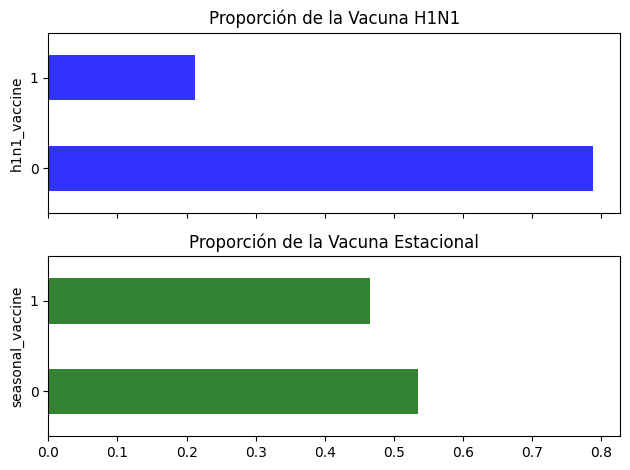

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = train_labels_df.shape[0]

(train_labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proporción de la Vacuna H1N1", ax=ax[0], color='blue', alpha=0.8)
)
ax[0].set_ylabel("h1n1_vaccine")

(train_labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proporción de la Vacuna Estacional", ax=ax[1], color='darkgreen', alpha=0.8)
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

Parece que aproximadamente la mitad de las personas recibieron la vacuna contra la gripe estacional, pero solo alrededor del 20% de las personas recibieron la vacuna contra la gripe H1N1. En términos de equilibrio de clases, decimos que el objetivo de la vacuna contra la gripe estacional tiene clases equilibradas, pero el objetivo de la vacuna contra la gripe H1N1 tiene clases moderadamente desequilibradas.

Vamos a ver si son independientes las variables objetivo, es decir, si hay alguna relación entre ellas. Para ello, primero construimos una tabla de contingencia de las dos variables objetivo.

In [22]:
pd.crosstab(
    train_labels_df["h1n1_vaccine"], 
    train_labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


Y ahora, calculamos el coeficiente de correlación de Pearson entre las dos variables objetivo.

In [23]:
# El coeficiente Phi es el mismo que el de Pearson para dos variables binarias
train_labels_df["h1n1_vaccine"].corr(train_labels_df["seasonal_vaccine"], method="pearson")

0.37714265306144495

Vemos que estas dos variables tienen un coeficiente phi de 0.37, lo que indica una correlación positiva moderada. Esto también se puede ver en la tabulación cruzada. La mayoría de las personas que se vacunaron contra la gripe H1N1 también se vacunaron contra la gripe estacional. Si bien una minoría de las personas que se vacunaron contra la gripe estacional se vacunaron contra la gripe H1N1, se vacunaron contra la gripe H1N1 en mayor proporción que quienes no se vacunaron contra la gripe estacional.

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
### **3.4. Análisis de las Características (Features)**
---
---

A continuación, echemos un vistazo a nuestras características. A partir de la página de descripción del problema, sabemos que las variables de características son casi todas categóricas: una combinación de características binarias, ordinales y nominales. Seleccionemos algunas y veamos cómo las tasas de vacunación pueden diferir en los distintos niveles de las variables de características.

Primero, combinemos nuestras características y etiquetas en un marco de datos.

In [24]:
# Unir las características de entrenamiento con las etiquetas de entrenamiento
joined_df = train_features_df.join(train_labels_df)

# Mostrar las dimensiones de los datos unidos
print(f'Dimensiones del conjunto de datos unidos: {joined_df.shape}')

# Mostrar las primeras filas de los datos unidos
joined_df.head()

Dimensiones del conjunto de datos unidos: (26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


A continuación, veamos cómo se correlacionan las características con las variables objetivo. Comenzaremos por intentar visualizar si existe una correlación bivariada simple. Si una característica está correlacionada con el objetivo, esperaríamos que haya diferentes patrones de vacunación a medida que varíen los valores de la característica.

Es difícil llegar directamente a la visualización final correcta. En lugar de eso, podemos elegir una característica y un objetivo y avanzar hasta un prototipo, antes de aplicarlo a más características y a ambos objetivos. Usaremos `h1n1_concern`, el nivel de preocupación que mostró la persona sobre la gripe H1N1, y `h1n1_vaccinecomo` variable objetivo.

Primero, obtendremos el recuento de observaciones para cada combinación de esas dos variables.

In [25]:
counts = (
    joined_df[['h1n1_concern', 'h1n1_vaccine']]
    .groupby(['h1n1_concern', 'h1n1_vaccine'])
    .size()
    .unstack('h1n1_vaccine')
)

counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


Es difícil calcular a simple vista estos números en bruto y ver patrones con claridad. Pongamos esto en un gráfico de barras. Compararemos cómo cambian los tamaños de los grupos a medida que varían.

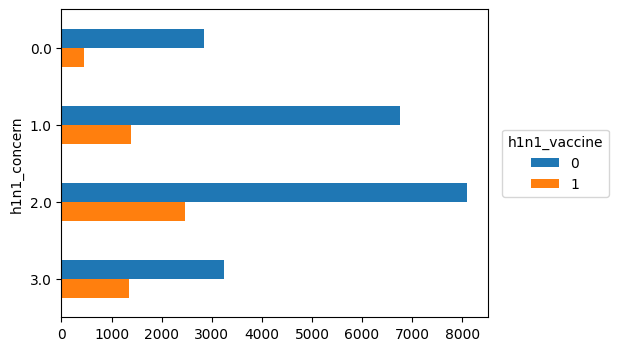

In [63]:
ax = counts.plot.barh(figsize=(5.5, 4))
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

Lamentablemente, todavía es difícil determinar si los niveles de `h1n1_concern` muestran diferencias en la probabilidad de que una persona se vacune. Dado que las dos clases están desequilibradas, simplemente vemos menos observaciones de personas vacunadas para cada nivel de `h1n1_concern`. Esto eclipsa cualquier otra tendencia que pudiera existir.

Veamos en cambio la tasa de vacunación para cada nivel de `h1n1_concern`.

In [36]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [37]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


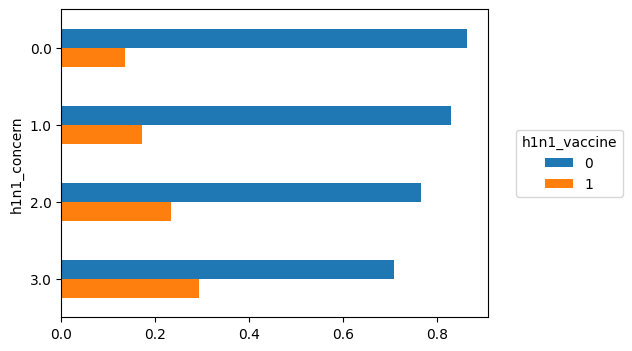

In [64]:
ax = props.plot.barh(figsize=(5.5, 4))
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Ahora tenemos una imagen más clara de lo que está sucediendo. En este gráfico, cada par de barras azules (sin vacuna) y naranjas (vacuna recibida) suman 1.0. Podemos ver claramente que, aunque la mayoría de las personas no se vacunan contra la gripe H1N1, es más probable que lo hagan si tienen un mayor nivel de preocupación. Parece que `h1n1_concern` será una característica útil cuando lleguemos a la modelización.

Dado que cada par de barras suma 1.0 y solo tenemos dos barras, este es en realidad un buen caso de uso para un gráfico de barras apiladas, para que sea aún más fácil de leer.

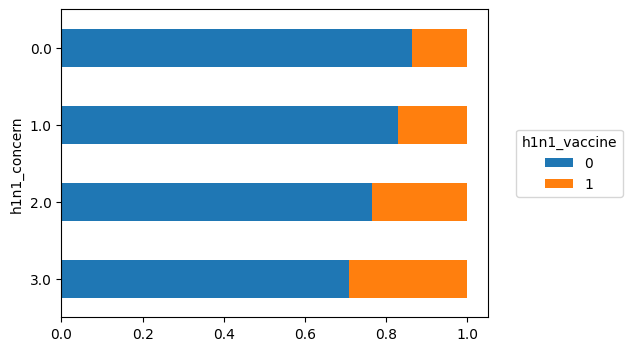

In [65]:
ax = props.plot.barh(figsize=(5.5, 4), stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Así, tenemos un gráfico de barras apiladas que muestra la tasa de vacunación para cada nivel de `h1n1_concern`. A medida que aumenta el nivel de preocupación, también lo hace la tasa de vacunación.

$\ $

$\ $

$\ $

---
#### **3.4.1. Analizando más variables**
---

Factoricemos este código en una función para que podamos usarlo en más variables.

In [57]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

Luego, recorreremos varias columnas y graficaremos tanto `h1n1_vaccine` como `seasonal_vaccine`.

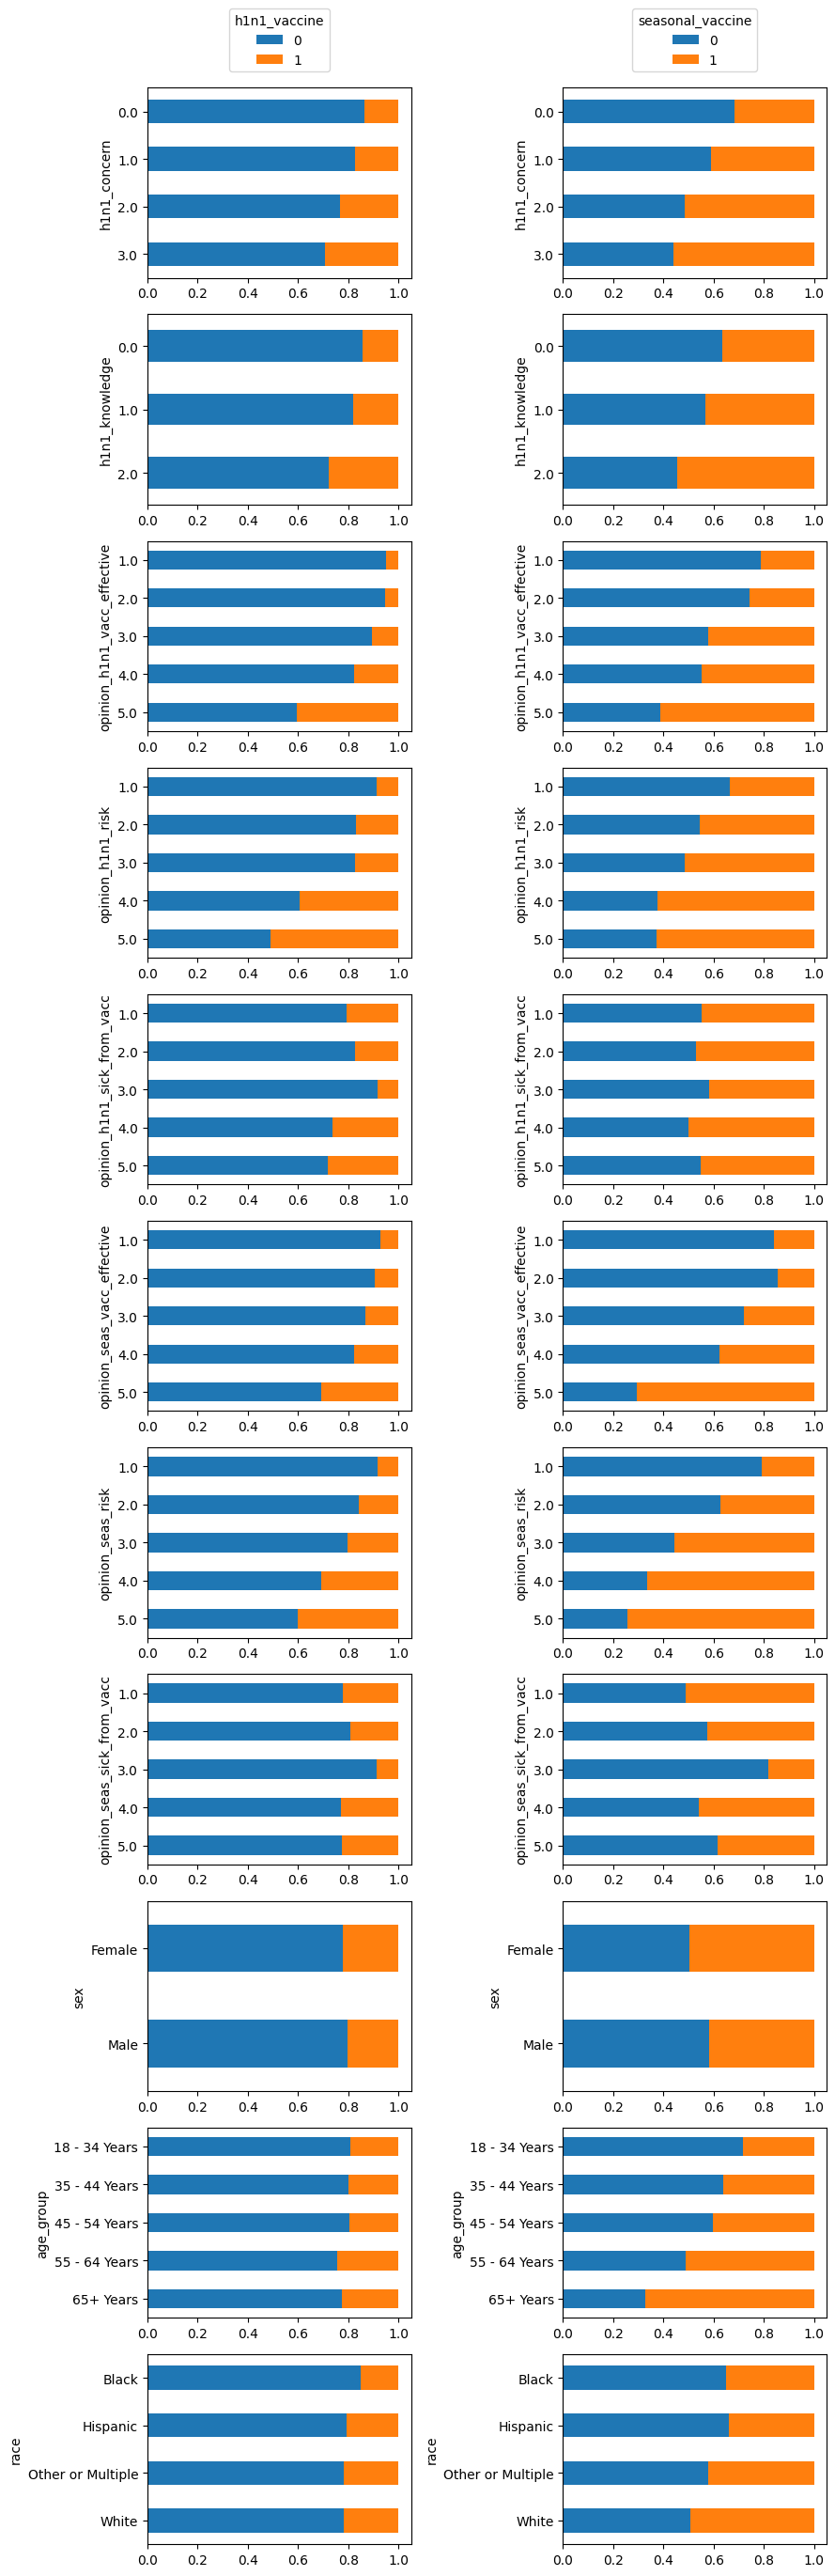

In [58]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

Parece que las preguntas sobre conocimiento y opinión tienen una señal bastante fuerte para ambas variables objetivo.

Las características demográficas tienen una correlación más fuerte con `seasonal_vaccine`, pero mucho menos hasta ahora `h1n1_vaccine`. En particular, vemos de manera interesante una fuerte correlación con con `age_groupel`, `seasonal_vaccinepero` no con `h1n1_vaccine`. Parece que con la gripe estacional, las personas actúan apropiadamente de acuerdo con el hecho de que las personas más afectadas y tienen mayor riesgo de complicaciones relacionadas con la gripe con la edad . Sin embargo, resulta que la gripe H1N1 tiene una relación interesante con la edad: aunque las personas mayores tienen un mayor riesgo de complicaciones, tenían menos probabilidades de infectarse. Si bien sabemos algo sobre la causalidad a partir de este análisis, parece que los factores de riesgo terminaron reflejándose en las tasas de vacunación.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

---
---
---
## **4. Preprocesamiento**
---
---
---

$\ $

---
---
### **4.1. Tratamiento de los valores nulos y codificación de las variables**
---
---

Para realizar un correcto preprocesamiento de los datos, es necesario hallar los valores nulos, anómalos, duplicados. Primero volvemos a ver la cantidad de valores nulos en cada variable. 

In [66]:
print(train_features_df.isnull().sum())

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Y ahora compronbamos si hay valores duplicados en el dataset.

In [67]:
print(train_features_df.duplicated().sum())

0


Se aprecia también que en todas las columnas, prácticamente, hay valores perdidos, destacando sobre todo las variables de `'health_insurance'`, `'employment_industry'` y `'employent_occupation'`, donde la no respuesta sesga prácticamente el 50% de los resultados para estas variables:

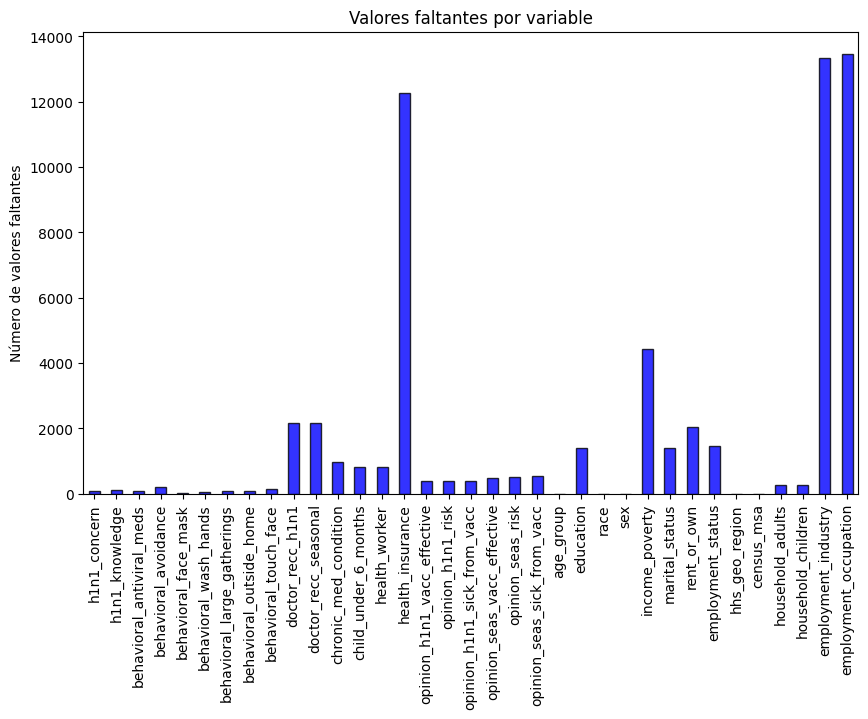

In [69]:
# Mostrar la cantidad de valores faltantes por variable de forma gráfica
plt.figure(figsize=(10, 6))
train_features_df.isnull().sum().plot(kind='bar', color='blue', alpha=0.8, edgecolor='black')
plt.title('Valores faltantes por variable')
plt.ylabel('Número de valores faltantes')
plt.show()

Podemos descartar directamente la columnas `employment_industry` , `employment_occupation` , `health_insurance`, ya que la mayoría de valores en estas variables son faltantes. A continuación pasaremos a analizar los atributos de este dataset para determinar la mejor estrategia de imputación:

In [70]:
train_features_df.drop(["employment_industry","employment_occupation","health_insurance"], axis=1, inplace=True)

Ahora, volvemos a ver la información de los datos resultantes.

In [71]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Ahora podemos ver si hay alguna otra columna cuyos valores perdidos sean también numerosos, decidiendo si es mejor eliminarlas o aplicar algún tipo de imputación.

In [72]:
train_features_df.isnull().sum()/train_features_df.shape[0]

h1n1_concern                   0.003445
h1n1_knowledge                 0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
opinion_h1n1_sick_from_vacc    0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000
sex                            0.000000
income_poverty                 0.165612


Vemos que principalmente las variables `income_poverty`, `doctor_recc_h1n1`, `doctor_recc_seasonal`, `opinion_h1n1_vacc_effective`, `opinion_h1n1_risk`, `opinion_h1n1_sick_from_vacc`, `opinion_seas_vacc_effective`, `opinion_seas_risk` y `opinion_seas_sick_from_vacc` tienen valores perdidos.

Graficamos, mediante un heatmap, los valores nulos por cada variable.

<Axes: ylabel='respondent_id'>

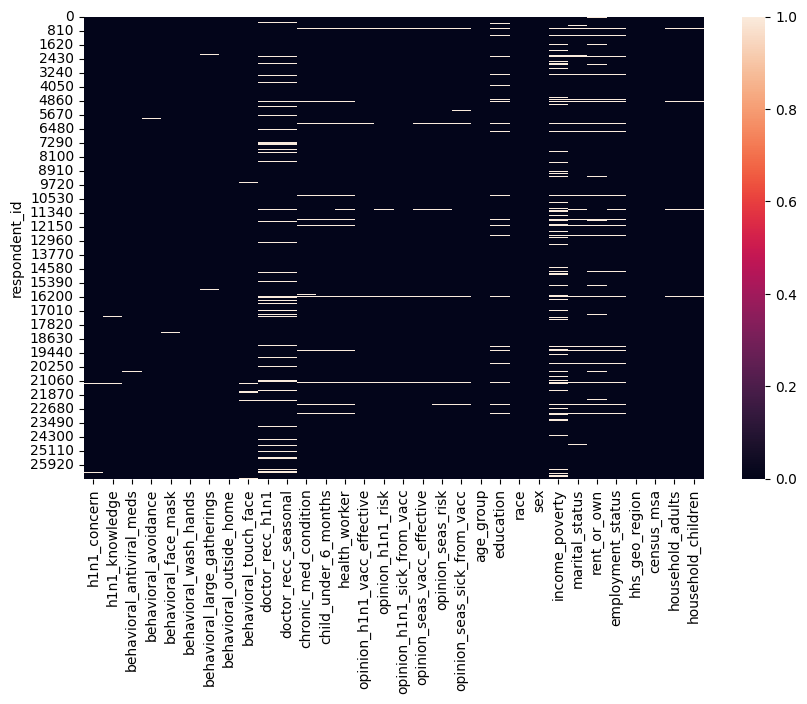

In [ ]:
# Mostrar la cantidad de valores faltantes por variable de forma gráfica
plt.figure(figsize=(10,6))
sns.heatmap(train_features_df.isnull())

Vamos analizar las posibles estrategias de imputación para las variables con valores perdidos.

Dado que ninguna variable presenta un alto ratio de valores perdidos ('income_poverty' es la variable que mayor número de valores perdidos tiene, un 16%), podemos optar por la imputación. Para aplicar esta técnica hay que tener en cuenta el tipo de variables que se tiene y las opciones disponibles en función de las características de las variables:

1. **Variables ordinales numéricas:**

    Estas columnas tienen valores numéricos que siguen un orden (ordinales) o son puramente cuantitativas (numéricas).
    Estas variables suelen estar correlacionadas entre sí y con otras características, como el nivel educativo o el conocimiento de salud pública (h1n1_knowledge). Utilizar una imputación basada en regresión multivariada (p. ej., IterativeImputer) puede capturar mejor las relaciones entre variables ordinales numéricas y proporcionar valores más realistas. MICE (Multivariate Imputation by Chained Equations) captura relaciones multivariantes entre las variables, lo cual es crucial para columnas ordinales donde los valores tienen un orden natural, por lo que puede considerarse también como una buena alternativa.

2. **Variables binarias:**

    Son respuestas de sí/no que no tienen un orden ni valores intermedios.
    Se puede optar, como manera sencilla, le imputación por la moda. Sin embargo, Random Forest es más robusto para manejar datos categóricos y puede capturar relaciones no lineales.


3. **Variables ordinales de texto:**

    Estas columnas tienen categorías con un orden lógico (por ejemplo, niveles de educación o rangos de edad).
    Dado que estas variables tienen un orden jerárquico, la imputación con la moda es una estrategia simple y efectiva.


4. **Variables categóricas nominales:**

    Son variables que toman valores discretos (por ejemplo, 0, 1, 2, 3). Son categorías sin un orden implícito, que representan grupos o etiquetas. En columnas nominales, imputar con el valor más frecuente es suficiente, ya que no hay relaciones ordinales que KNN pueda aprovechar. Para capturar relaciones complejas entre las categorías y otras variables, Random Forest es mejor, especialmente para columnas como employment_status, que puede depender de factores como edad o ingresos.


5. **Variables numéricas:**

    Representan conteos y son continuas en teoría, aunque están limitadas a valores enteros.
    Estas columnas suelen estar correlacionadas entre sí o con otras variables (por ejemplo, los ingresos del hogar o el estado civil podrían relacionarse con el número de adultos/niños en el hogar), por lo que KNNImputer es ideal para valores numéricos continuos cuando hay relaciones claras con otras columnas.

$\ $

Asímismo, todas las variables que contengan cadenas de texto han de ser codificadas en función de las características de las mismas:

- **Variables ordinales de texto:** 

    Se ha usado un OrdinalEncoder para convertir estos valores textuales en valores numéricos (por ejemplo, "Nada preocupado" se convertiría en 0, "Poco preocupado" en 1, etc.), siguiendo el orden especificado en un diccionario de mapeo.

- **Variables Binarias:** 

    Este tipo de variable es tratada como una categoría, por lo que no se necesita un tipo especial de codificación. Las variables binarias de texto también se codifican como números (0 y 1) mediante el OrdinalEncoder.

- **Variables Categóricas Nominales:**

    Se ha utilizado OneHotEncoder para estas columnas. Esta técnica es adecuada cuando las categorías no tienen un orden y quieres representar cada una de ellas de manera independiente.

$\ $

Una vez comentado todo esto, pasamos a realizar dicha imputación y codificación de las variables del siguiente modo:

In [76]:
# Variables ordinales (numéricas y de texto)
ordinal_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
ordinal_cols_str = ['age_group', 'education', 'income_poverty']

# Variables binarias (numéricas y de texto)
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
               'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
               'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker']
binary_cols_str = ['sex', 'marital_status', 'rent_or_own']

# Variables categóricas nominales (sin orden)
nominal_cols_str = ['race', 'employment_status', 'hhs_geo_region', 'census_msa']

# Variables numéricas
numeric_cols = ['household_adults', 'household_children']

# Mapeos de orden para columnas ordinales en formato de texto
ordinal_col_order = {
    'age_group': ['18 - 34 Years', '35 - 44 Years', '55 - 64 Years', '45 - 54 Years', '65+ Years'],
    'education': ['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
    'income_poverty': ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
}

# Pipeline para columnas ordinales numéricas con MICE
ordinal_numeric_pipeline = Pipeline([
    ('iterative_imputer', IterativeImputer(max_iter=10, random_state=42))
])

# Pipeline para columnas ordinales de texto con imputación por moda y codificación ordinal
ordinal_str_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[ordinal_col_order[col] for col in ordinal_cols_str]))
])

# Pipeline para columnas binarias numéricas con imputación por Random Forest
binary_pipeline = Pipeline([
    ('iterative_imputer', IterativeImputer(random_state=42))
])

# Pipeline para columnas binarias de texto con imputación por moda y codificación ordinal
binary_str_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

# Pipeline para columnas categóricas nominales con imputación por moda y codificación OneHot
nominal_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),  # Aseguramos que no haya valores nulos antes del OneHot
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para columnas numéricas generales con KNNImputer
numeric_pipeline = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=5))
])

# Preprocesamiento general con ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal_numeric', ordinal_numeric_pipeline, ordinal_cols),  # MICE para columnas ordinales numéricas
        ('ordinal_str', ordinal_str_pipeline, ordinal_cols_str),  # Imputación por moda + OrdinalEncoder para texto ordinal
        ('binary', binary_pipeline, binary_cols),  # Random Forest para columnas binarias numéricas
        ('binary_str', binary_str_pipeline, binary_cols_str),  # Imputación por moda + OrdinalEncoder para texto binario
        ('nominal', nominal_pipeline, nominal_cols_str),  # Moda + OneHot para columnas nominales
        ('numeric', numeric_pipeline, numeric_cols)  # KNNImputer para columnas numéricas
    ],
    remainder='drop'  # Elimina columnas no especificadas
)

# Pipeline general
data_preprocessing_pipeline = Pipeline([
    ('preprocessor', column_transformer)
])

Y una vez definido todo el proceso de preprocesamiento, lo aplicamos a los datos de entrenamiento del siguiente modo:

In [77]:
# Aplicar el pipeline al dataset
preprocessed_data = data_preprocessing_pipeline.fit_transform(train_features_df)

# Generar nombres de columnas para el DataFrame final
output_columns = (
    ordinal_cols +
    ordinal_cols_str +
    binary_cols +
    binary_cols_str +
    list(data_preprocessing_pipeline.named_steps['preprocessor'].transformers_[4][1].named_steps['one_hot_encoder'].get_feature_names_out(nominal_cols_str)) +
    numeric_cols
)

# Convertir los datos procesados en DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=output_columns)

# Guardar el resultado en un archivo CSV
preprocessed_df.to_csv('../../Data/Preprocessed/Prueba3/preprocessed_training_dataset.csv', index=True)

# Mostrar las primeras filas del DataFrame preprocesado
preprocessed_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
0,1.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,2.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
3,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


Y ahora, aplicamos el mismo proceso a los datos de test:

In [78]:
# Aplicar el mismo preprocesamiento al dataset de prueba
test_set_preprocessed = data_preprocessing_pipeline.transform(test_features_df)

# Generar los nombres de columnas para el DataFrame de prueba
output_columns = (
    ordinal_cols +
    ordinal_cols_str +
    binary_cols +
    binary_cols_str +
    list(data_preprocessing_pipeline.named_steps['preprocessor'].transformers_[4][1].named_steps['one_hot_encoder'].get_feature_names_out(nominal_cols_str)) +
    numeric_cols
)

# Convertir los datos transformados a un DataFrame
test_set_preprocessed_df = pd.DataFrame(test_set_preprocessed, columns=output_columns, index=test_features_df.index)

# Guardar el DataFrame preprocesado en un archivo CSV
test_set_preprocessed_df.to_csv("../../Data/Preprocessed/Prueba3/preprocessed_test_dataset.csv", index=True)

# Mostrar las primeras filas del DataFrame preprocesado de prueba
test_set_preprocessed_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26708,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
26709,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
26710,1.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26711,3.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Una vez hemos aplicado todos los cambios anteriormente mencionados, podemos pasar a estudiar las características de nuestro dataset una vez preprocesado y ver las relaciones entre variables finales que usaremos para ajustar nuestros modelos de Machine Learning. Primero comprobamos que todas las columnas están preprocesadas, por ejemplo, vamos a ver si disponemos de valores nulos en nuestro dataset:

In [79]:
print(preprocessed_df.shape)
print(preprocessed_df.isnull().sum())

(26707, 48)
h1n1_concern                            0
h1n1_knowledge                          0
opinion_h1n1_vacc_effective             0
opinion_h1n1_risk                       0
opinion_h1n1_sick_from_vacc             0
opinion_seas_vacc_effective             0
opinion_seas_risk                       0
opinion_seas_sick_from_vacc             0
age_group                               0
education                               0
income_poverty                          0
behavioral_antiviral_meds               0
behavioral_avoidance                    0
behavioral_face_mask                    0
behavioral_wash_hands                   0
behavioral_large_gatherings             0
behavioral_outside_home                 0
behavioral_touch_face                   0
doctor_recc_h1n1                        0
doctor_recc_seasonal                    0
chronic_med_condition                   0
child_under_6_months                    0
health_worker                           0
sex                   

Obtenemos un resumen de las variables numéricas de nuestro dataset:

In [96]:
preprocessed_df.describe()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.618295,1.262364,3.849066,2.341741,2.358514,4.024094,2.717659,2.119185,2.173962,2.036732,...,0.077807,0.160894,0.083985,0.107051,0.116149,0.436028,0.294455,0.269517,0.886499,0.534583
std,0.909092,0.616842,1.001211,1.278088,1.354546,1.078658,1.374485,1.321165,1.454646,1.000205,...,0.267873,0.367440,0.277371,0.309183,0.320410,0.495900,0.455806,0.443717,0.749901,0.923836
min,0.000000,0.000000,1.000000,0.828099,1.000000,1.000000,0.768294,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


Podemos añadir las etiquetas al dataset para estudiar, a groso modo, las variables que mayor correlación presentan:

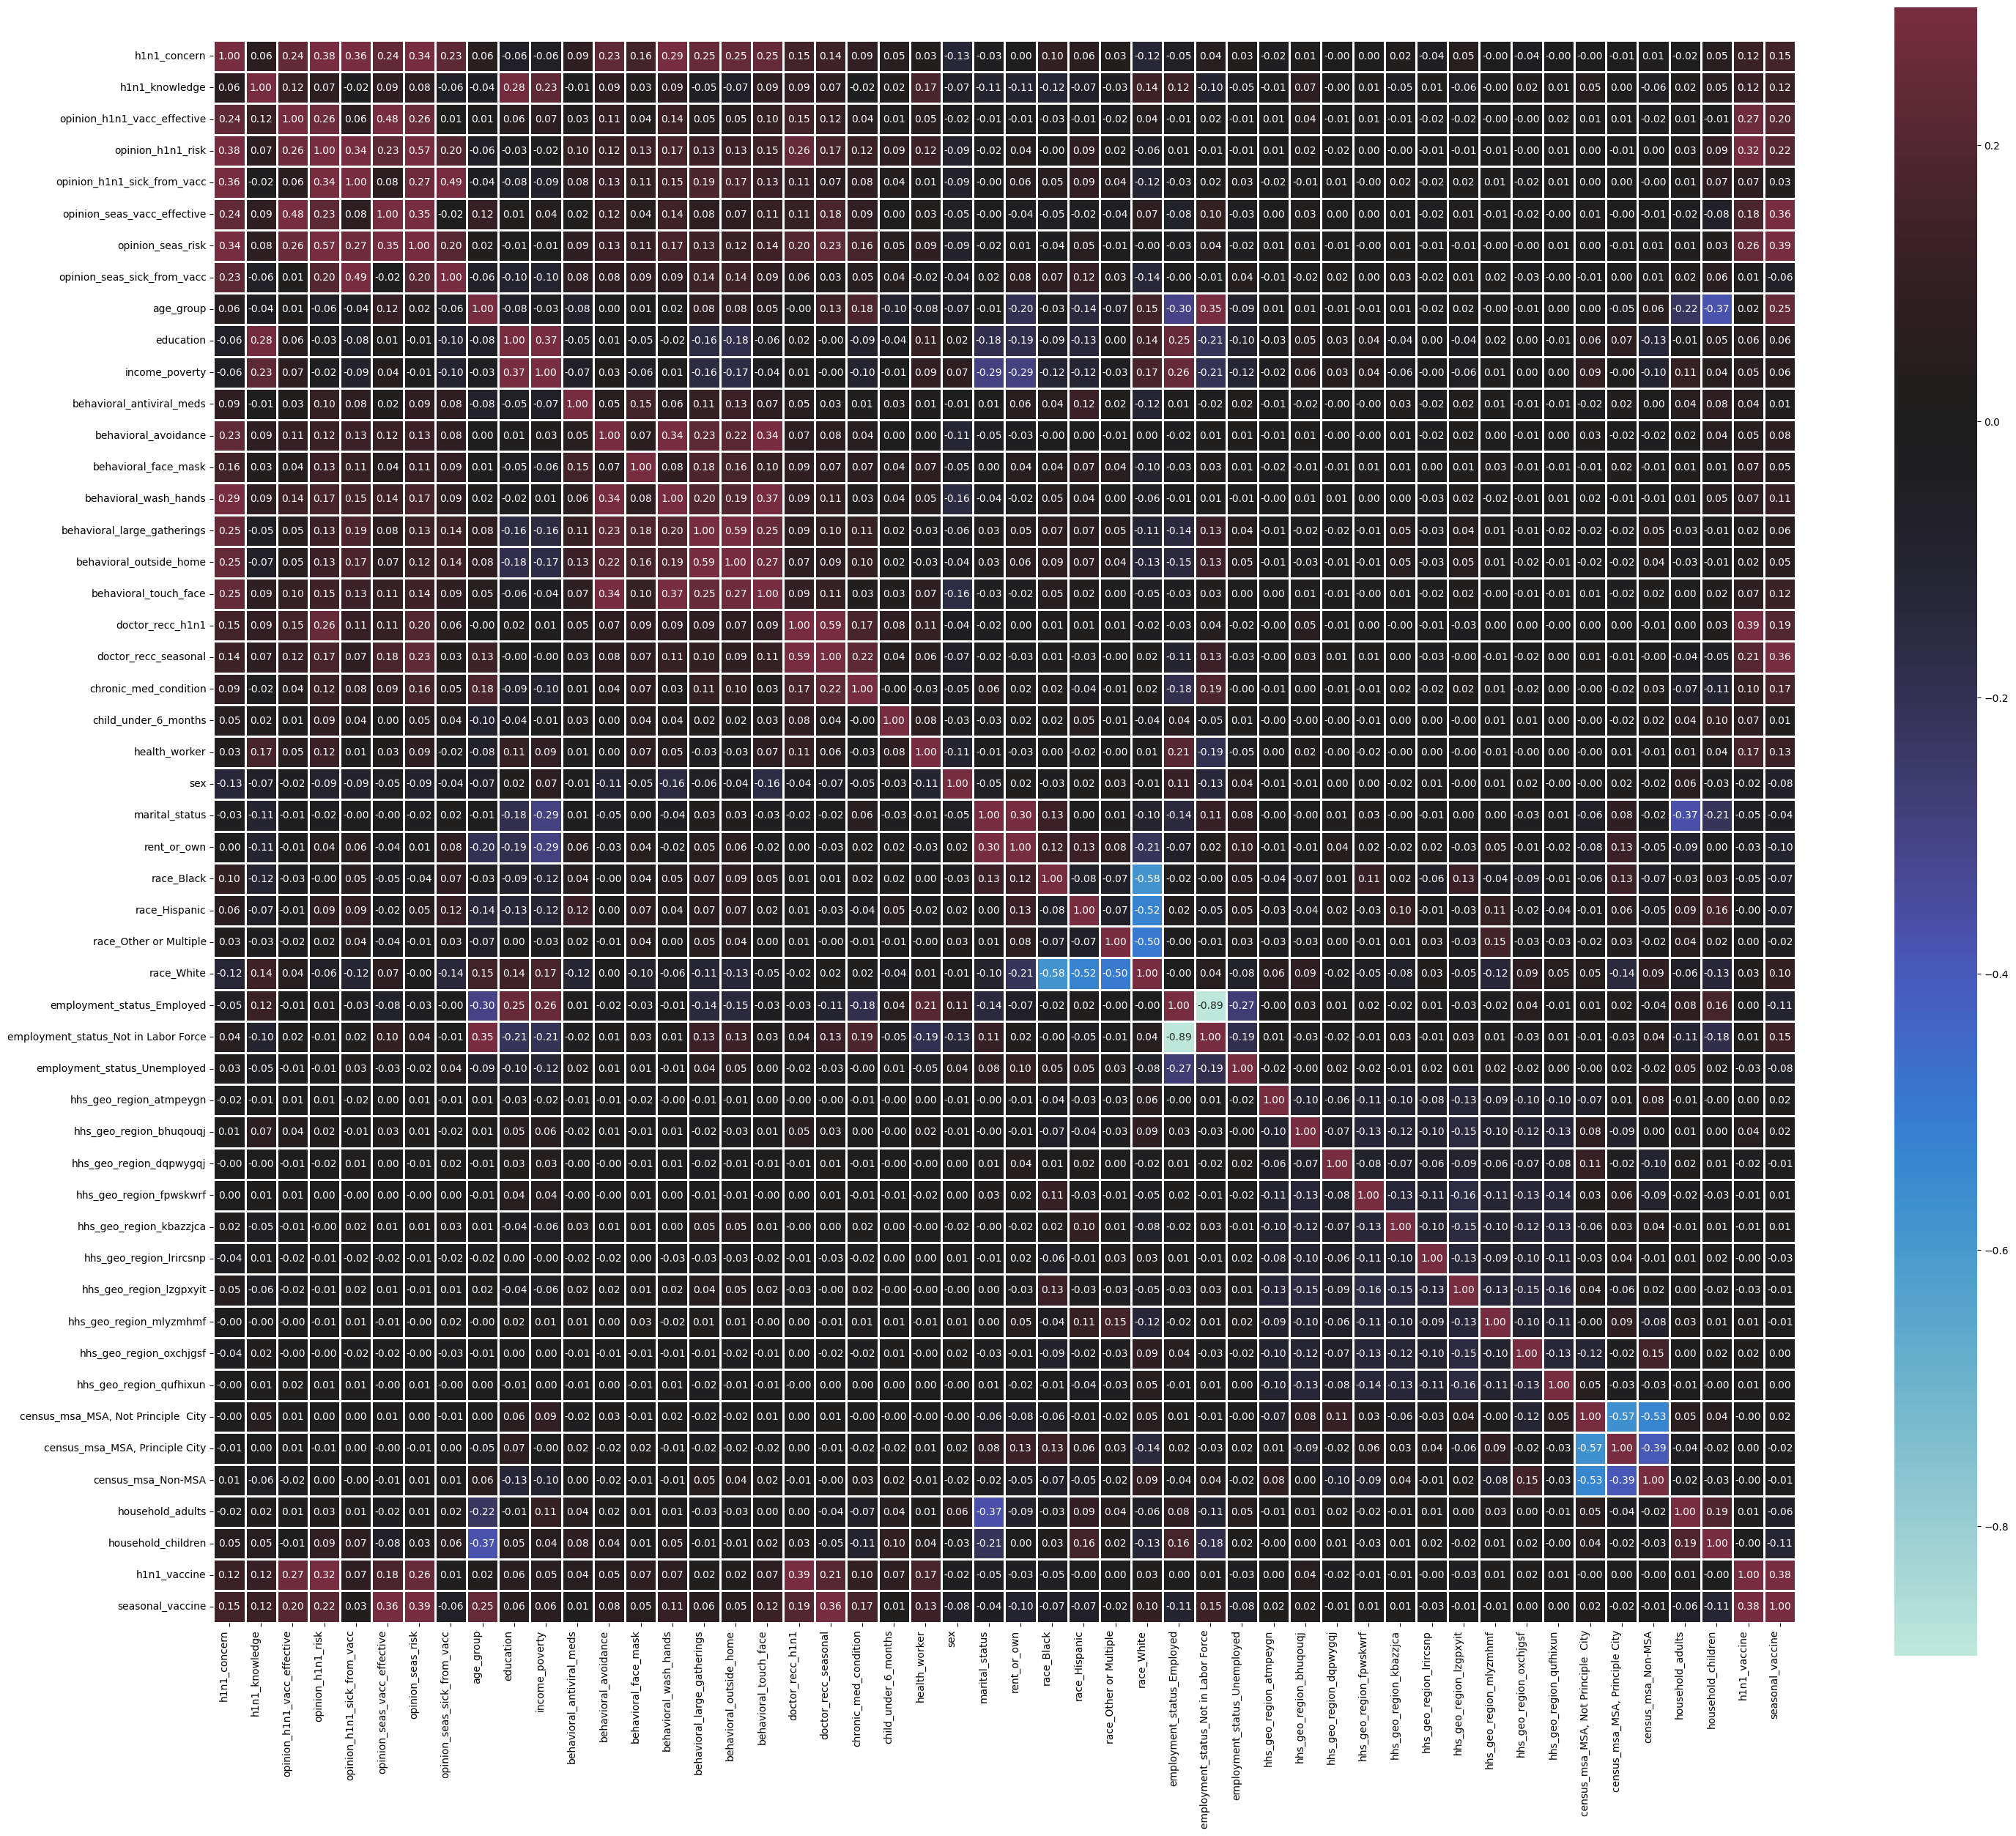

In [80]:
preprocessed_df_with_labels = pd.concat([preprocessed_df, train_labels_df], axis=1)

# Calcular la matriz de correlación
corr = preprocessed_df_with_labels.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(30, 25))  # Asegúrate de que la figura tenga un tamaño adecuado

g = sns.heatmap(corr, vmax=.3, center=0, 
                square=True, linewidths=1, annot=True, fmt='.2f')

# Ajustar los márgenes de la figura
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Rotar las etiquetas de los ejes para hacerlas más legibles
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Etiquetas del eje Y

# Mostrar el gráfico
plt.show()

A pesar de que no se han encontrado correlaciones positivas muy intensas $(\leq 60\%)$, si que se aprecian algunas correlaciones inversas más intensas entre las variables `employment_status_employed` y `employment_status_not in Labor Force`, lo que nos hace pensar que las variables que mayor correlación tengan son redundantes en realidad. 

Respecto de las etiquetas, las variables más influyentes son el haberse puesto la otra vacuna anteriormente, la recomendación del doctor o las opiniones de riesto y efectividad.

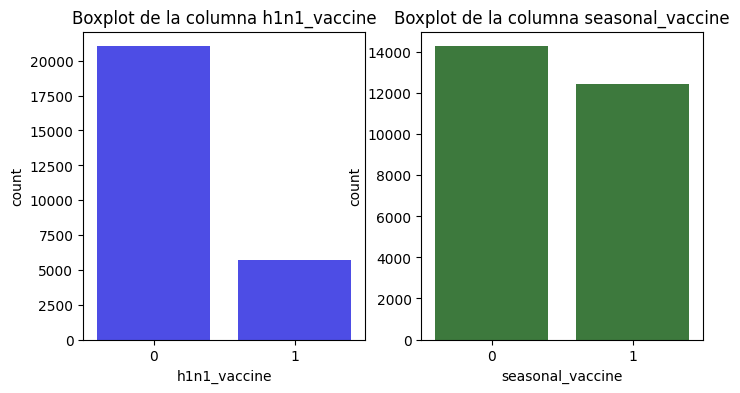

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Primer gráfico de barras
sns.countplot(data=preprocessed_df_with_labels, x='h1n1_vaccine', color='blue', alpha=0.8, ax=ax[0])
ax[0].set_title('Boxplot de la columna h1n1_vaccine')
ax[0].set_xlabel('h1n1_vaccine')

# Segundo gráfico de barras
sns.countplot(data=preprocessed_df_with_labels, x='seasonal_vaccine', color='darkgreen', alpha=0.8, ax=ax[1])
ax[1].set_title('Boxplot de la columna seasonal_vaccine')
ax[1].set_xlabel('seasonal_vaccine')

plt.show()

Parece que la vacuna H1N1 no ha sido aplicada a tantas personas, sobre todo en comparación con los que han recibido la vacuna estacional, podríamos sospechar que la concienciación y otras preguntas de opinión relacionadas con esta enfermedad también muestan signos de desconocimiento o desconfianza.